In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

SEED = 123
np.random.seed = SEED

In [2]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

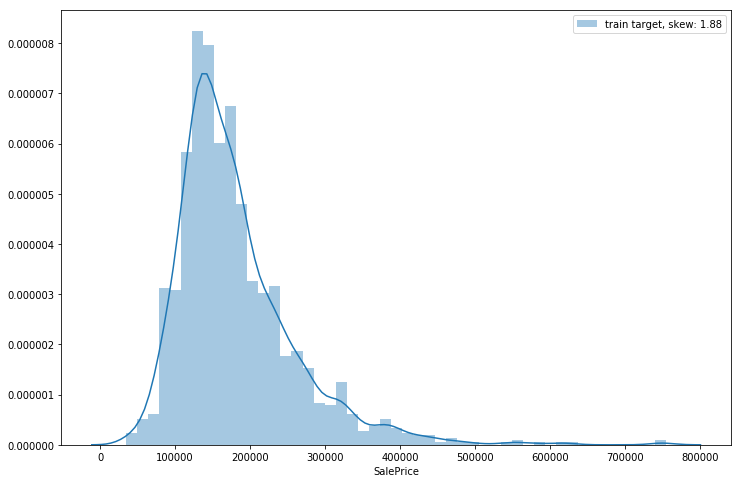

In [3]:
plt.figure(figsize=(12, 8))

sns.distplot(train["SalePrice"], label=f'train target, skew: {train["SalePrice"].skew():.2f}')
plt.legend(loc="best")
plt.show()

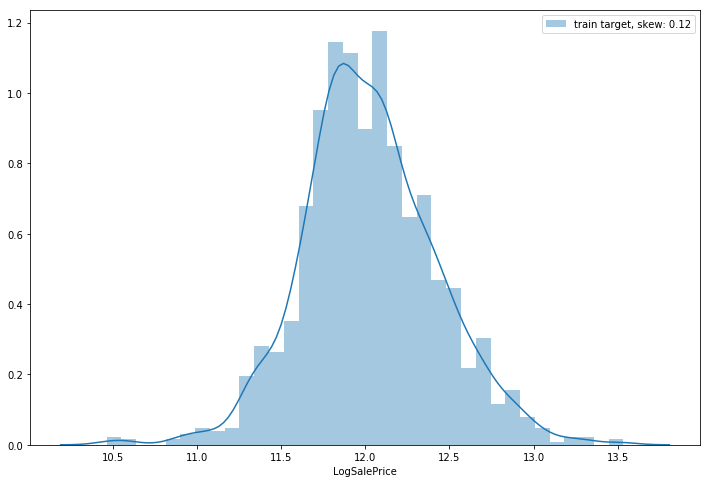

In [4]:
# log transform target
train["LogSalePrice"] = np.log(train["SalePrice"])

# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(train["LogSalePrice"], label=f'train target, skew: {train["LogSalePrice"].skew():.2f}')
plt.legend(loc='best')
plt.show()

In [5]:
corr = train.corr()
corr_matrix = corr.nlargest(10, columns='SalePrice')['SalePrice']

print(corr_matrix)

SalePrice       1.000000
LogSalePrice    0.948374
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64


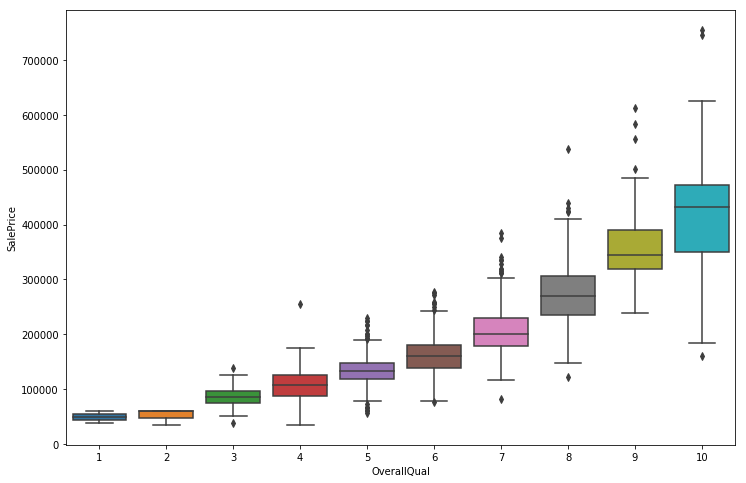

In [6]:
plt.figure(figsize=(12, 8))
sns.boxplot(train['OverallQual'], train['SalePrice'])
plt.show()

In [7]:
print("Shape before dropping", train.shape)
train.drop(train[(train['OverallQual'] == 10) & (train['SalePrice'] > 600000)].index, inplace=True)
train.drop(train[(train['OverallQual'] == 10) & (train['SalePrice'] < 200000)].index, inplace=True)
train.drop(train[(train['OverallQual'] == 9) & (train['SalePrice'] > 500000)].index, inplace=True)
train.drop(train[(train['OverallQual'] == 8) & (train['SalePrice'] < 150000)].index, inplace=True)
train.drop(train[(train['OverallQual'] == 8) & (train['SalePrice'] > 400000)].index, inplace=True)
train.drop(train[(train['OverallQual'] == 7) & (train['SalePrice'] < 150000)].index, inplace=True)
train.drop(train[(train['OverallQual'] == 7) & (train['SalePrice'] > 300000)].index, inplace=True)
train.drop(train[(train['OverallQual'] == 4) & (train['SalePrice'] > 200000)].index, inplace=True)
print("Shape after dropping", train.shape)

Shape before dropping (1460, 82)
Shape after dropping (1404, 82)


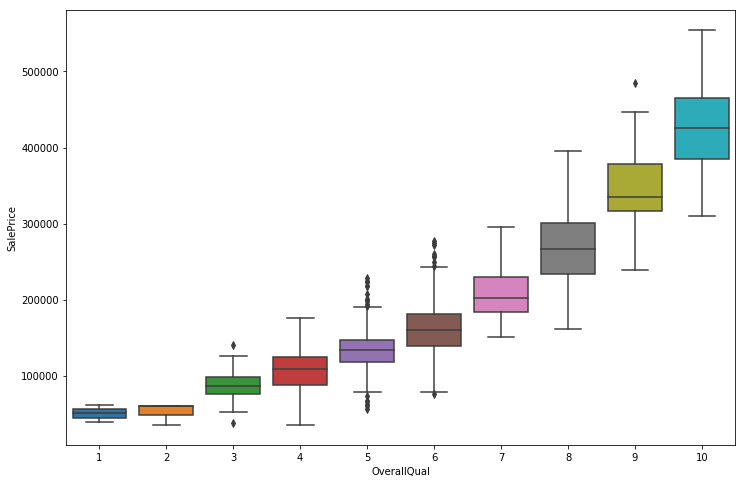

In [8]:
plt.figure(figsize=(12, 8))
sns.boxplot(train['OverallQual'], train['SalePrice'])
plt.show()

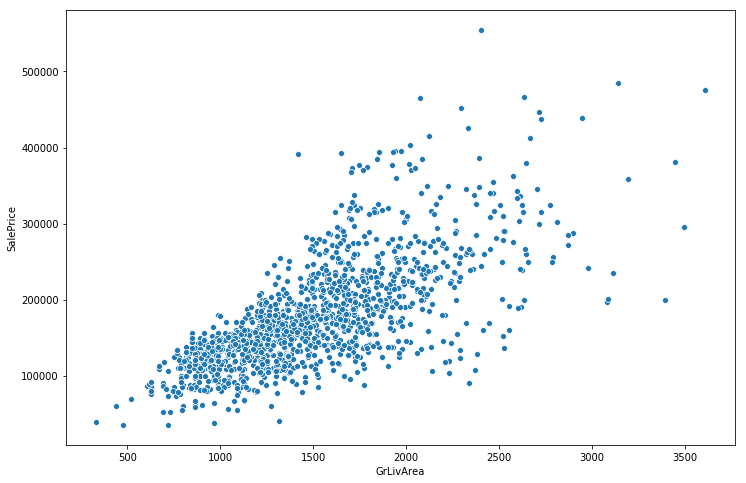

In [9]:
plt.figure(figsize=(12, 8))
sns.scatterplot(train["GrLivArea"], train["SalePrice"])
plt.show()

In [10]:
train.drop(train[(train["GrLivArea"] > 3000) & (train["SalePrice"] < 300000)].index, inplace=True)

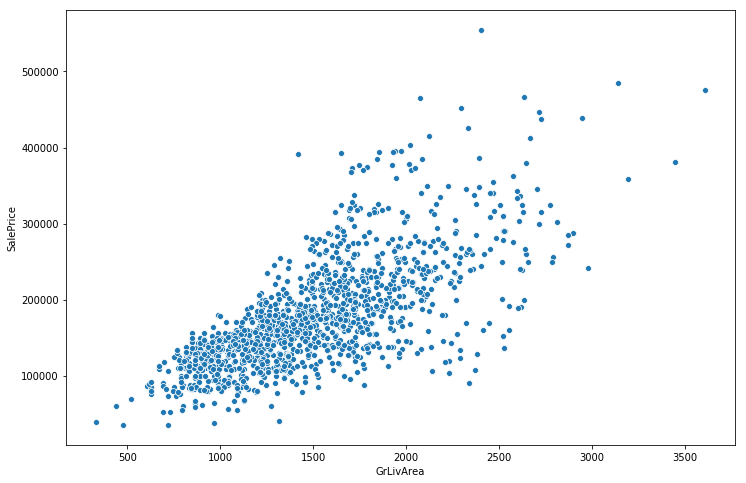

In [11]:
plt.figure(figsize=(12, 8))
sns.scatterplot(train["GrLivArea"], train["SalePrice"])
plt.show()

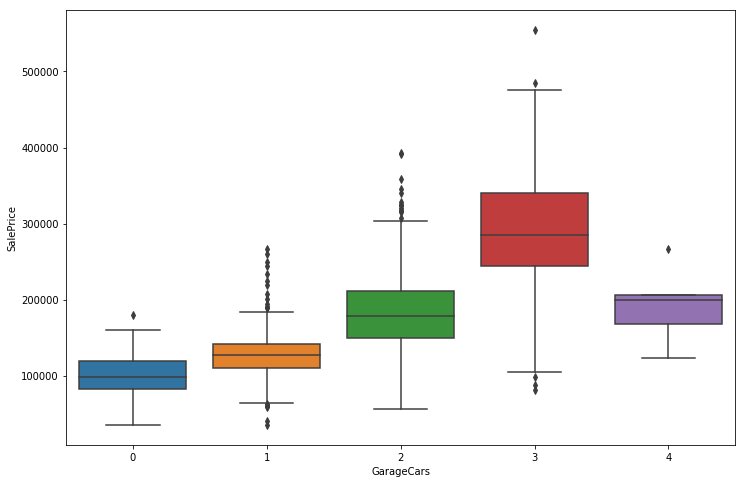

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(train["GarageCars"], train["SalePrice"])

In [13]:
def get_missing_values(df):
    missing = (df.isna().sum() / df.isna().count()) * 100
    missing_df = pd.DataFrame(data=missing.sort_values(ascending=False), columns=["Percentage"])
    return missing_df

In [14]:
def impute_process(df):
    
    df["MSZoning"].fillna(df["MSZoning"].mode()[0], inplace=True)
    df["Functional"].fillna(df["Functional"].mode()[0], inplace=True)
    df["SaleType"].fillna(df["SaleType"].mode()[0], inplace=True)
    df["KitchenQual"].fillna(df["KitchenQual"].mode()[0], inplace=True)
    
    # Garage Variables
    garage_features = ['GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea' ,'GarageFinish', 'GarageQual', 'GarageCond']
  
    for feature in garage_features:
        if df[feature].dtype == "object":
            df[feature].fillna("None", inplace=True)
        else:
            df[feature].fillna(0.0, inplace=True)
        
    # Basement Variables 
    basement_features = [
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', \
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'
    ]
    
    df['BsmtExposure'].fillna("No", inplace=True)
    
    for feature in basement_features:
        if df[feature].dtype == "object":
            df[feature].fillna("None", inplace=True)
        else:
            df[feature].fillna(0.0, inplace=True)
    
    # Fireplace Variables
    df["FireplaceQu"].fillna("None", inplace=True)
    # Pool Variables     
    df["PoolQC"].fillna("None", inplace=True)
    df["MasVnrType"].fillna("None", inplace=True)
    df["MasVnrArea"].fillna(0.0, inplace=True)
    df["Electrical"].fillna("SBrkr", inplace=True)
    df["Fence"].fillna("None", inplace=True)
    df["Alley"].fillna("None", inplace=True)
    # Lot Variables
    df["LotFrontage"].fillna(0.0, inplace=True)
    
    
    df.drop(columns=["MiscFeature", 'MSSubClass', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
                     'GarageCond', 'LotFrontage', 'LotShape', 'LandSlope', 'Condition2', \
                     "Utilities", "MiscVal", 'Exterior1st','Exterior2nd','Foundation', 'RoofStyle', \
                     'RoofMatl', 'BldgType', 'HouseStyle', 'ExterCond', 'BsmtFinType1', 'BsmtFinSF1', \
                    'BsmtFinSF2', 'HeatingQC', 'MoSold'], inplace=True)
    
    return df
    
processed_train = impute_process(train.copy())
processed_test = impute_process(test.copy())

In [15]:
y_train = processed_train["SalePrice"]
y_train_logged = processed_train["LogSalePrice"]

processed_train.drop(columns=["Id", "SalePrice", "LogSalePrice"], inplace=True)
processed_test.drop(columns=["Id"], inplace=True)

print(processed_train.shape)
print(processed_test.shape)

(1399, 53)
(1459, 53)


In [16]:
from sklearn.preprocessing import MinMaxScaler

def normalize_cols(df):
    num_cols = processed_train.select_dtypes(include=np.number).columns
    scaler = MinMaxScaler()
    for col in num_cols:
        df[col] = scaler.fit_transform(np.reshape(df[col].values, (-1, 1)))
        
    return df
    
processed_train = normalize_cols(processed_train.copy())
processed_test = normalize_cols(processed_test.copy())

In [17]:
def encode_columns(df):
    cat_cols = df.select_dtypes(include="object").columns
    return pd.get_dummies(df, columns=cat_cols, drop_first=True)
   
processed_train = encode_columns(processed_train.copy())
processed_test = encode_columns(processed_test.copy())

print(processed_train.shape)
print(processed_test.shape)

(1399, 143)
(1459, 140)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(processed_train, y_train_logged,\
                                                    test_size=0.25, random_state=SEED)
print(f"Shape of training features {X_train.shape}")
print(f"Shape of test features {X_test.shape}")

Shape of training features (1049, 143)
Shape of test features (350, 143)


In [19]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

folds = KFold(n_splits=5)

In [20]:
from sklearn.model_selection import GridSearchCV

def grid_search(model, params = {}):
    gr = GridSearchCV(model, params, scoring="r2", cv=5, verbose=1, n_jobs=-1)
    gr.fit(X_train, y_train)
    return gr.best_estimator_

lasso = grid_search(Lasso(), { "alpha": [1e-15, 1e-10, 1e-8, 1e-4, 1e-2, 1, 5, 10]})

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.1s finished


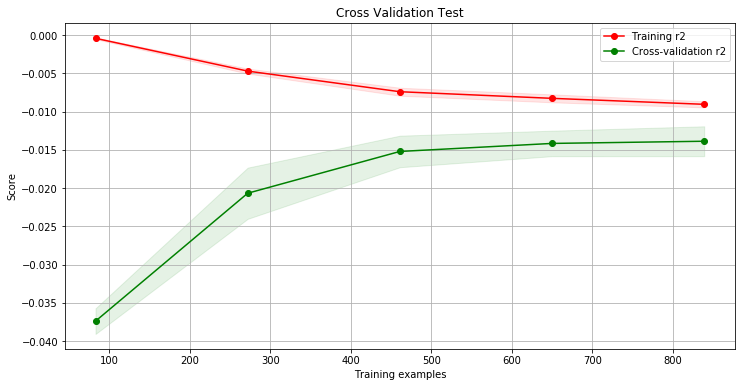

In [21]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model):
    plt.figure(figsize=(12, 6))
    plt.title("Cross Validation Test")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=folds, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5), random_state=SEED, scoring="neg_mean_squared_error")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training r2")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation r2")

    plt.legend(loc="best")
    plt.show()
    
plot_learning_curve(lasso)

In [22]:
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [23]:
np.sqrt(mean_squared_error(y_pred, y_test))

0.0965030071453277

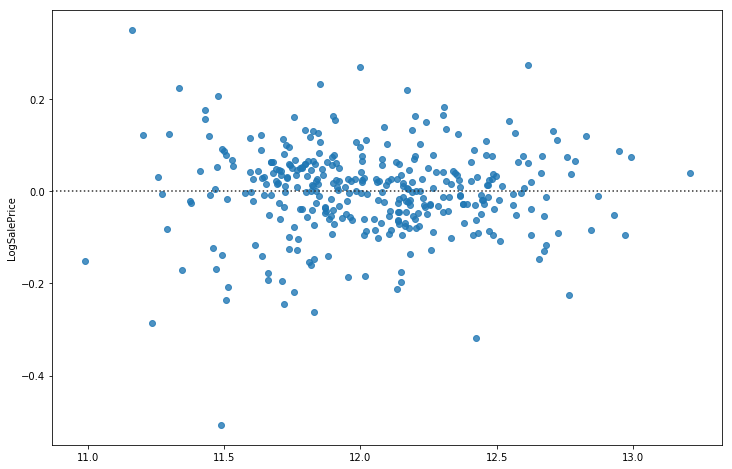

In [24]:
# residual plots for checking hetroskedacity
plt.figure(figsize=(12, 8))
sns.residplot(y_pred, (y_test - y_pred))
plt.show()

In [25]:
processed_test.shape, X_train.shape

((1459, 140), (1049, 143))

In [26]:
ridge = grid_search(Ridge(), { "alpha": [1e-15, 1e-10, 1e-8, 1e-4, 1e-2, 1, 5, 10]})

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


In [27]:
ridge.fit(X_train, y_train)
y_pred  = ridge.predict(X_test)
np.sqrt(mean_squared_error(y_pred, y_test))

0.09431957086590717

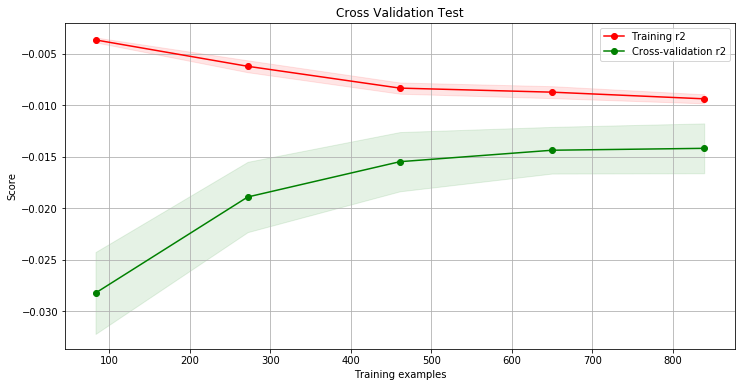

In [28]:
plot_learning_curve(ridge)

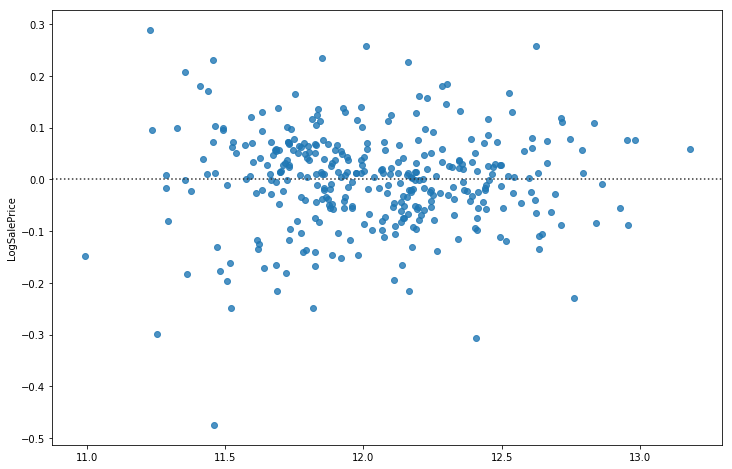

In [29]:
# residual plots for checking hetroskedacity
plt.figure(figsize=(12, 8))
sns.residplot(y_pred, (y_test - y_pred))
plt.show()

In [30]:
elastic = grid_search(ElasticNet(), { "alpha": [1e-15, 1e-10, 1e-8, 1e-4, 1e-2, 1, 5, 10]})

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.8s finished


In [31]:
elastic.fit(X_train, y_train)
y_pred  = elastic.predict(X_test)
np.sqrt(mean_squared_error(y_pred, y_test))

0.09595420244339728

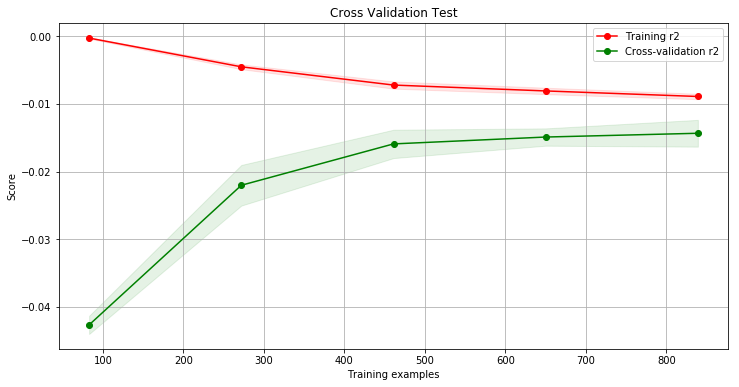

In [32]:
plot_learning_curve(elastic)

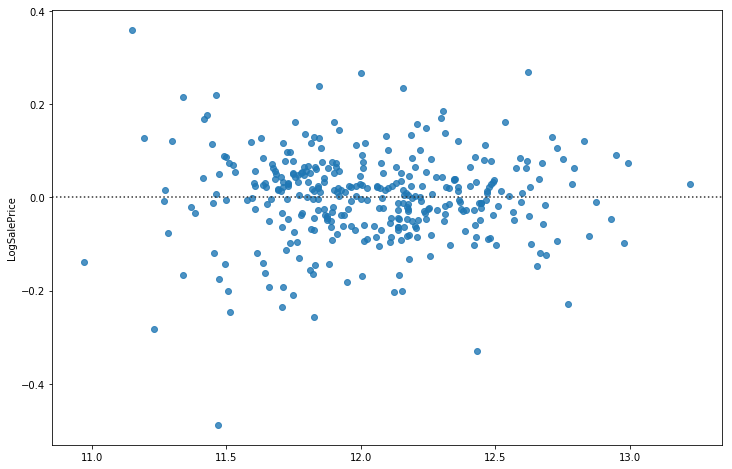

In [33]:
# residual plots for checking hetroskedacity
plt.figure(figsize=(12, 8))
sns.residplot(y_pred, (y_test - y_pred))
plt.show()

In [108]:
from sklearn.ensemble import RandomForestRegressor

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node\
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_forest = grid_search(RandomForestRegressor(n_jobs=-1, random_state=SEED), random_grid)

Fitting 5 folds for each of 4320 candidates, totalling 21600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 43.7min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 57.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 72.0min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 87.6min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 103.7min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 120.2min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 144.9min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 165.7min
[Parallel(n_jobs=-1)]: Done 11234 tasks   

In [109]:
random_forest.base_estimator_.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
np.sqrt(mean_squared_error(y_pred, y_test))

0.117215775753499

In [110]:
random_forest.base_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')